Alur Preprocesssing data :
1. Cleaning
2. Case Folding
3. Normalisasi kata (Kamus Kata Baku)
4. Tokenizing
5. Stopword Removal/Filtering
6. Stemming
7. Translate (Opsional)
8. Labeling

# PERSIAPAN DATA

DATASET

In [1]:
import pandas as pd


data = pd.read_csv('efisiensianggaran.csv', sep=";")
data.head(4)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,"1,91E+18",Thu Apr 10 05:13:17 +0000 2025,0,Ini bukan efisiensi ini pengabaian sistematis ...,"1,91E+18",NaN,semutapi_media,in,NaN,0.0,0.0,0.0,https://x.com/semutapi_media/status/1910199385...,"1,43E+18",semutapi_media
1,"1,91E+18",Thu Apr 10 03:36:25 +0000 2025,0,Mesin pengering tangan di wastafel toilet pada...,"1,91E+18",NaN,NaN,in,🌍,0.0,1.0,0.0,https://x.com/Mudzkh/status/1910175004312166644,1217340673,Mudzkh
2,"1,91E+18",Wed Apr 09 11:40:48 +0000 2025,0,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,"1,91E+18",NaN,NaN,in,"Surakarta, Jawa Tengah",0.0,0.0,0.0,https://x.com/RADARSOLO_/status/19099345156879...,"8,92E+17",RADARSOLO_
3,"1,91E+18",Wed Apr 09 06:43:19 +0000 2025,0,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,"1,91E+18",NaN,NaN,in,Tanjung Selor,0.0,0.0,0.0,https://x.com/KaltaraTribun/status/19098596522...,"1,69E+18",KaltaraTribun


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      704 non-null    object 
 1   created_at               704 non-null    object 
 2   favorite_count           704 non-null    int64  
 3   full_text                704 non-null    object 
 4   id_str                   681 non-null    object 
 5   image_url                399 non-null    object 
 6   in_reply_to_screen_name  97 non-null     object 
 7   lang                     681 non-null    object 
 8   location                 404 non-null    object 
 9   quote_count              681 non-null    float64
 10  reply_count              681 non-null    float64
 11  retweet_count            681 non-null    float64
 12  tweet_url                681 non-null    object 
 13  user_id_str              681 non-null    object 
 14  username                 6

In [3]:
data.describe()

,favorite_count,quote_count,reply_count,retweet_count
count,704.000000,681.000000,681.000000,681.000000
mean,8.423295,0.205580,1.975037,3.108664
std,65.752693,1.711217,16.028218,30.060575
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000
max,1509.000000,26.000000,278.000000,608.000000


# VISUALISASI DATA SEBELUM PREPROCESSING

VISUALISASI DATA BEFORE PREPROCESSING

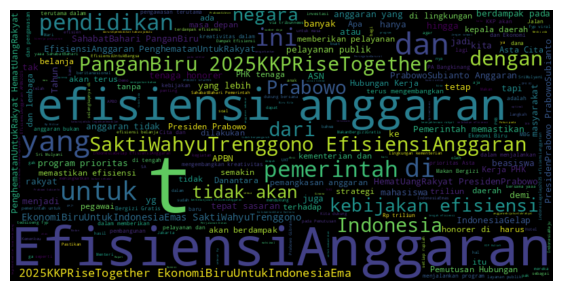

In [4]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai NaN dengan String Kosong ('')
df = data.copy()
df['full_text'] = df['full_text'].fillna('')

#Menggabungkan semua teks dalam kolom 'content'
text = ' '.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
#Max_words angka bisa diubah
wc.generate(text)

plt.figure(figsize=(7, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

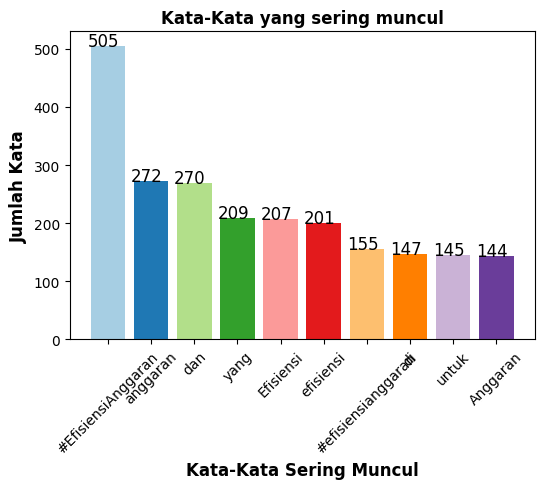

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data['full_text'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

words, counts = zip(*top_words)


colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(6, 4))
bars = plt.bar(words, counts, color=colors)
plt.xlabel('Kata-Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Kata-Kata yang sering muncul', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height(), str(num), fontsize=12, color='black', ha='center')

plt.show()

# DATA PREPROCESSING

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('efisiensianggaran.csv', sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      704 non-null    object 
 1   created_at               704 non-null    object 
 2   favorite_count           704 non-null    int64  
 3   full_text                704 non-null    object 
 4   id_str                   681 non-null    object 
 5   image_url                399 non-null    object 
 6   in_reply_to_screen_name  97 non-null     object 
 7   lang                     681 non-null    object 
 8   location                 404 non-null    object 
 9   quote_count              681 non-null    float64
 10  reply_count              681 non-null    float64
 11  retweet_count            681 non-null    float64
 12  tweet_url                681 non-null    object 
 13  user_id_str              681 non-null    object 
 14  username                 6

In [7]:
data.head(3)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,"1,91E+18",Thu Apr 10 05:13:17 +0000 2025,0,Ini bukan efisiensi ini pengabaian sistematis ...,"1,91E+18",NaN,semutapi_media,in,NaN,0.0,0.0,0.0,https://x.com/semutapi_media/status/1910199385...,"1,43E+18",semutapi_media
1,"1,91E+18",Thu Apr 10 03:36:25 +0000 2025,0,Mesin pengering tangan di wastafel toilet pada...,"1,91E+18",NaN,NaN,in,🌍,0.0,1.0,0.0,https://x.com/Mudzkh/status/1910175004312166644,1217340673,Mudzkh
2,"1,91E+18",Wed Apr 09 11:40:48 +0000 2025,0,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,"1,91E+18",NaN,NaN,in,"Surakarta, Jawa Tengah",0.0,0.0,0.0,https://x.com/RADARSOLO_/status/19099345156879...,"8,92E+17",RADARSOLO_


In [8]:
df = pd.DataFrame(data[['created_at','username','full_text']])
df.head(5)

,created_at,username,full_text
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...


In [9]:
df.to_csv('sentiment.csv', index=False)

CLEANING

In [10]:
data = pd.read_csv('sentiment.csv')
data.head()

,created_at,username,full_text
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  704 non-null    object
 1   username    681 non-null    object
 2   full_text   704 non-null    object
dtypes: object(3)
memory usage: 16.6+ KB


In [12]:
data.drop_duplicates(subset='full_text', keep='first', inplace=True)
#menghapus data duplikat

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  704 non-null    object
 1   username    681 non-null    object
 2   full_text   704 non-null    object
dtypes: object(3)
memory usage: 16.6+ KB


In [14]:
df = pd.DataFrame(data[['created_at','username','full_text']])
#jika semua data mau di cleaning hapus .iloc, pada kasus ini hanya kolom 100:200 .iloc[100:200]
df.head(10)

,created_at,username,full_text
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...
5,Mon Apr 07 01:48:20 +0000 2025,RADARSOLO_,Dampak Efisiensi Anggaran Hotel di Solo Ikut T...
6,Sat Mar 29 04:14:46 +0000 2025,TubasMediaCom,Imbas Efisiensi Anggaran Besar-besaran Prabowo...
7,Thu Mar 27 11:53:21 +0000 2025,TubasMediaCom,Dampak Buruk Efisiensi Anggaran Telah Menelan ...
8,Thu Mar 27 05:20:13 +0000 2025,InnfoA1,Pemerintah dan yang mana yg gak boleh? Pls ban...
9,Wed Mar 26 06:59:40 +0000 2025,dustyrosepjy,Maaf yah ponakan2ku tahun ini thrnya dipotong ...


CLEANING

In [15]:
import re
import string
import nltk

#Remove URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

#Remove HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'',tweet)
    else:
        return tweet

#Remove Emoji (Biarkan ! dan ? untuk vader)
def remove_emojis(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001FA00-\U0001FA6F"  # Symbols for Legacy Computing / Chess Symbols
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

#Remove Angka
def remove_numbers(tweet):
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols(tweet):
    # Menghapus semua simbol kecuali huruf, angka, spasi, tanda seru (!), dan tanda tanya (?)
    tweet = re.sub(r'[^a-zA-Z0-9\s!?]', '', tweet)
    return tweet

#Remove Username
def remove_username(tweet):
    if tweet is not None and isinstance(tweet, str):
        username = re.compile(r'@\w+')
        return username.sub('', tweet)
    else:
        return tweet

df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emojis(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))  # Menghapus simbol kecuali ! dan ?
df.head(5)

,created_at,username,full_text,cleaning
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...


CASE FOLDING

In [16]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,created_at,username,full_text,cleaning,case_folding
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,di tengah efisiensi anggaran pemkab tana tidun...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...


NORMALISASI DATA

In [17]:
import pandas as pd

# Baca kamus kata baku dari file Excel
kamus_data = pd.read_excel('kamuskatabaku.xlsx')

# Konversi kamus menjadi dictionary untuk pencarian cepat
kamus_tidak_baku = {str(k).strip().lower(): str(v).strip().lower() for k, v in zip(kamus_data['tidak_baku'], kamus_data['kata_baku'])}

# Fungsi untuk mengganti kata tidak baku dengan kata baku
def replace_taboo_words(text, kamus_tidak_baku):
    if not isinstance(text, str):
        return "", [], []

    words = text.split()
    replaced_words = []
    kata_baku = []
    kata_tidak_baku = []

    for word in words:
        word_lower = word.lower()
        if word_lower in kamus_tidak_baku:
            baku_word = kamus_tidak_baku[word_lower]
            replaced_words.append(baku_word)
            kata_baku.append(baku_word)
            kata_tidak_baku.append(word)
        else:
            replaced_words.append(word)

    replaced_text = ' '.join(replaced_words)
    return replaced_text, kata_baku, kata_tidak_baku

# Terapkan fungsi penggantian kata tidak baku
df['normalisasi'], df['kata_baku'], df['kata_tidak_baku'] = zip(
    *df['case_folding'].astype(str).apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
)

# Buat DataFrame baru hanya dengan kolom yang dibutuhkan
data = pd.DataFrame(df[['created_at','username','full_text']])

# Simpan hasil normalisasi ke file baru (opsional)
# df.to_excel('hasil_normalisasi2.xlsx', index=False)

# Menampilkan subset DataFrame yang diambil
df_subset = df.iloc[5:10]
df_subset.head(5)

,created_at,username,full_text,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku
5,Mon Apr 07 01:48:20 +0000 2025,RADARSOLO_,Dampak Efisiensi Anggaran Hotel di Solo Ikut T...,Dampak Efisiensi Anggaran Hotel di Solo Ikut T...,dampak efisiensi anggaran hotel di solo ikut t...,dampak efisiensi anggaran hotel di solo ikut t...,[],[]
6,Sat Mar 29 04:14:46 +0000 2025,TubasMediaCom,Imbas Efisiensi Anggaran Besar-besaran Prabowo...,Imbas Efisiensi Anggaran Besarbesaran Prabowo ...,imbas efisiensi anggaran besarbesaran prabowo ...,imbas efisiensi anggaran besarbesaran prabowo ...,[],[]
7,Thu Mar 27 11:53:21 +0000 2025,TubasMediaCom,Dampak Buruk Efisiensi Anggaran Telah Menelan ...,Dampak Buruk Efisiensi Anggaran Telah Menelan ...,dampak buruk efisiensi anggaran telah menelan ...,dampak buruk efisiensi anggaran telah menelan ...,[],[]
8,Thu Mar 27 05:20:13 +0000 2025,InnfoA1,Pemerintah dan yang mana yg gak boleh? Pls ban...,Pemerintah dan yang mana yg gak boleh? Pls ban...,pemerintah dan yang mana yg gak boleh? pls ban...,pemerintah dan yang mana yang tidak boleh? pls...,"[yang, tidak]","[yg, gak]"
9,Wed Mar 26 06:59:40 +0000 2025,dustyrosepjy,Maaf yah ponakan2ku tahun ini thrnya dipotong ...,Maaf yah ponakanku tahun ini thrnya dipotong ...,maaf yah ponakanku tahun ini thrnya dipotong ...,maaf ya ponakanku tahun ini thrnya dipotong da...,[ya],[yah]


TOKENISASI

In [18]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

,created_at,username,full_text,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,[],[],"[ini, bukan, efisiensi, ini, pengabaian, siste..."
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,[tidak],[g],"[mesin, pengering, tangan, di, wastafel, toile..."
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,[],[],"[dilema, pariwisata, solo, pasca, lebaran, efi..."
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,di tengah efisiensi anggaran pemkab tana tidun...,di tengah efisiensi anggaran pemkab tana tidun...,[tak],[tk],"[di, tengah, efisiensi, anggaran, pemkab, tana..."
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,[],[],"[tak, lagi, dianggarkan, insentif, guru, di, k..."


FILTERING/STOPWORD REMOVAL

In [19]:
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def remove_stopwords(token_list):
    return [word for word in token_list if word not in stop_words]

# Tambahkan hasil stopword removal ke df
df['stop_removal'] = df['tokenize'].apply(remove_stopwords)

# Gabungkan token hasil stopword menjadi string
df['stop_removal_joined'] = df['stop_removal'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

df.head(5)

,created_at,username,full_text,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,stop_removal,stop_removal_joined
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,[],[],"[ini, bukan, efisiensi, ini, pengabaian, siste...","[efisiensi, pengabaian, sistematis, kecerdasan...",efisiensi pengabaian sistematis kecerdasan ban...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,[tidak],[g],"[mesin, pengering, tangan, di, wastafel, toile...","[mesin, pengering, tangan, wastafel, toilet, d...",mesin pengering tangan wastafel toilet dicopot...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,[],[],"[dilema, pariwisata, solo, pasca, lebaran, efi...","[dilema, pariwisata, solo, pasca, lebaran, efi...",dilema pariwisata solo pasca lebaran efisiensi...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,di tengah efisiensi anggaran pemkab tana tidun...,di tengah efisiensi anggaran pemkab tana tidun...,[tak],[tk],"[di, tengah, efisiensi, anggaran, pemkab, tana...","[efisiensi, anggaran, pemkab, tana, tidung, up...",efisiensi anggaran pemkab tana tidung upayakan...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,[],[],"[tak, lagi, dianggarkan, insentif, guru, di, k...","[dianggarkan, insentif, guru, kaltara, dihapus...",dianggarkan insentif guru kaltara dihapus efis...


STEAMING DATA

In [21]:
#!pip install Sastrawi

#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from nltk.stem import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [24]:
#factory = StemmerFactory()
#stemmer = factory.create_stemmer()

#def stem_text(text):
  #return [stemmer.stem(word) for word in text]

#df['stemming_data'] = df['stop_removal'].apply(lambda x: ' '.join(stem_text(x)))
#df.head(5)

,created_at,username,full_text,cleaning,case_folding,normalisasi,kata_baku,kata_tidak_baku,tokenize,stop_removal,stop_removal_joined,stemming_data
0,Thu Apr 10 05:13:17 +0000 2025,semutapi_media,Ini bukan efisiensi ini pengabaian sistematis ...,Ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,ini bukan efisiensi ini pengabaian sistematis ...,[],[],"[ini, bukan, efisiensi, ini, pengabaian, siste...","[efisiensi, pengabaian, sistematis, kecerdasan...",efisiensi pengabaian sistematis kecerdasan ban...,efisiensi abai sistematis cerdas bangsa baca l...
1,Thu Apr 10 03:36:25 +0000 2025,Mudzkh,Mesin pengering tangan di wastafel toilet pada...,Mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,mesin pengering tangan di wastafel toilet pada...,[tidak],[g],"[mesin, pengering, tangan, di, wastafel, toile...","[mesin, pengering, tangan, wastafel, toilet, d...",mesin pengering tangan wastafel toilet dicopot...,mesin ering tangan wastafel toilet dicopotin o...
2,Wed Apr 09 11:40:48 +0000 2025,RADARSOLO_,Dilema Pariwisata Solo Pasca Lebaran: Efisiens...,Dilema Pariwisata Solo Pasca Lebaran Efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...,[],[],"[dilema, pariwisata, solo, pasca, lebaran, efi...","[dilema, pariwisata, solo, pasca, lebaran, efi...",dilema pariwisata solo pasca lebaran efisiensi...,dilema pariwisata solo pasca lebaran efisiensi...
3,Wed Apr 09 06:43:19 +0000 2025,KaltaraTribun,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,Di Tengah Efisiensi Anggaran Pemkab Tana Tidun...,di tengah efisiensi anggaran pemkab tana tidun...,di tengah efisiensi anggaran pemkab tana tidun...,[tak],[tk],"[di, tengah, efisiensi, anggaran, pemkab, tana...","[efisiensi, anggaran, pemkab, tana, tidung, up...",efisiensi anggaran pemkab tana tidung upayakan...,efisiensi anggar pemkab tana tidung upaya inse...
4,Wed Apr 09 03:45:49 +0000 2025,kompascom,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,Tak Lagi Dianggarkan Insentif Guru di Kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,tak lagi dianggarkan insentif guru di kaltara ...,[],[],"[tak, lagi, dianggarkan, insentif, guru, di, k...","[dianggarkan, insentif, guru, kaltara, dihapus...",dianggarkan insentif guru kaltara dihapus efis...,anggar insentif guru kaltara hapus efisiensi s...


HAPUS DATA BERNILAI KOSONG (NaN)

In [ ]:
df.info()

In [ ]:
#data= df.dropna()

In [ ]:
data.info()

In [ ]:
#Save Data Preprosessing
df.to_csv('Hasil Preprocessing Data.csv',encoding='utf8',index=False)

# VISUALISASI DATA SETELAH PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


#Menggabungkan semua teks dalam kolom 'content'
text = ' '.join(df['stop_removal_joined'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
#Max_words angka bisa diubah
wc.generate(text)

plt.figure(figsize=(7, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the preprocessed data
data = pd.read_csv('Hasil Preprocessing Data.csv')

text = " ".join(data['stop_removal_joined'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

words, counts = zip(*top_words)

colors = plt.cm.Paired(range(len(words)))

plt.figure(figsize=(6, 4))
bars = plt.bar(words, counts, color=colors)
plt.xlabel('Kata-Kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Kata-Kata yang sering muncul', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height(), str(num), fontsize=12, color='black', ha='center')

plt.show()

#TRANSLATE KE BAHASA INGGRIS

In [ ]:
import pandas as pd

df = pd.read_csv('Hasil Preprocessing Data.csv')
df.head(5)

In [ ]:
data.info()

In [ ]:
#TRANSLATE hanya karena akan di Label Pakai VaderSentiment
#Install Library googletranslate
!pip install googletrans==4.0.0-rc1

#import library yang diperlukan
from googletrans import Translator
import pandas as pd

df = pd.read_csv('Hasil Preprocessing Data.csv')

In [ ]:
from googletrans import Translator
import time

# Buat objek translator sekali saja di luar loop
translator = Translator()

# Fungsi untuk menerjemahkan teks dan mengonversinya ke huruf kecil
def translate_text(text, target_language='en'):
    if text is None or text == '':
        return ''  # Kembalikan string kosong jika teks kosong
    translation = translator.translate(text, dest=target_language)
    return translation.text.lower()  # Konversi hasil ke lowercase

# Iterasi melalui kolom "stop_removal_joined" dan menerjemahkan teks
translated_data = []

for index, row in df.iterrows():
    try:
        translated_text = translate_text(row['stop_removal_joined'])
        translated_data.append(translated_text)
        time.sleep(1)  # delay 1 detik antar request untuk menghindari timeout
    except Exception as e:
        print(f"Error di index {index}: {e}")
        translated_data.append('')  # Isi dengan kosong kalau gagal translate

# Tambahkan kolom terjemahan ke DataFrame
df['translated_data'] = translated_data

# Menampilkan beberapa hasil
df[['stop_removal_joined', 'translated_data']].head(10)


In [ ]:
df.head(5)

In [ ]:
df.to_csv('Hasil Translate Dataset.csv', encoding='utf-8', index=False)

# LABELING SENTIMENT / TRANSFORMATION DENGAN VADER SENTIMENT

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Unduh leksikon VADER
nltk.download('vader_lexicon')

# Baca dataset
data = pd.read_csv('Hasil Translate Dataset.csv', sep=",")

# Hapus kolom yang tidak diperlukan (jika ada)
# Misalnya, jika ingin menghapus kolom 'Unnamed: 0':
# data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=[], errors='ignore')  # Menghindari error jika kolom tidak ada


In [ ]:
# Inisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Hitung skor sentimen untuk setiap teks
def calculate_sentiment_scores(text):
    return sia.polarity_scores(text)

# Terapkan fungsi ke kolom 'translated_stemming_data'
sentiment_scores = data['translated_data'].apply(calculate_sentiment_scores)

# Ekstrak skor positif, negatif, netral, dan compound
data['Positive'] = sentiment_scores.apply(lambda x: x['pos'])
data['Negative'] = sentiment_scores.apply(lambda x: x['neg'])
data['Neutral'] = sentiment_scores.apply(lambda x: x['neu'])
data['Compound'] = sentiment_scores.apply(lambda x: x['compound'])


In [ ]:
# Kategorikan sentimen berdasarkan skor compound
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Compound'].apply(categorize_sentiment)

In [ ]:
# Hitung jumlah masing-masing sentimen
sentiment_counts = data['Sentiment'].value_counts()

# Tampilkan 10 baris pertama dan jumlah sentimen
print("\nJumlah Sentimen:")
print(sentiment_counts)

Save Excel

In [ ]:
data.to_excel('labeling_vader.xlsx', index=False, engine='openpyxl')